### <font color = 'green'> Predicting Student GPA from their SATs (An Hypothetical study)



A university redefined its success metrics to aim for 70% of its graduates achieving high GPAs after completing their studies.  

To accomplish this, they analyzed historical data of students' SAT scores and their corresponding GPAs. Since the data is recent (collected in 2022) and intended to build a model predicting prospective students' academic performance (i.e., their GPA in the following year), it was utilized to develop a predictive model.  

Because the dataset contains only one independent variable (SAT scores) and one dependent variable (GPA), a simple linear regression model was chosen. This approach uses a straight-line equation to establish the relationship between the features.



<img src="./Images/istockphoto-1146185198-612x612.jpg" alt="Image" style="width:100%;">

## <font color = 'green'> Begin The Analyses

---

##### <font color = 'green'> __Import Libraries__

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### <font color = 'green'> **Read the Data**

In [4]:
score = pd.read_csv(r'./SAT_GPA.csv')

##### <font color = 'green'> __Assess the data__

In [5]:
score.info()

# the data-types for both columns are correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     100 non-null    int64  
 1   GPA     100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
score.isnull().sum()

# there are no null data

SAT    0
GPA    0
dtype: int64

In [7]:
score.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [8]:
score.describe()

,SAT,GPA
count,100.000000,100.000000
mean,1850.760000,3.360500
std,101.566331,0.258845
min,1634.000000,2.400000
25%,1776.500000,3.270000
50%,1850.000000,3.410000
75%,1934.000000,3.520000
max,2050.000000,3.810000


__<font color = 'green'> Statistics Insights </font>__:


- SAT Scores:
The SAT scores of 100 students have a mean of 1850, with a minimum of 1634 and a maximum of 2050. The median is also 1850, suggesting the data is symmetrical. However, the standard deviation is 101.57, indicating a significant spread in scores. While 50% of students scored between 1777 and 1934 (the interquartile range), the high standard deviation shows that not all students are close to the maximum score. Most students performed in the mid-range, with only a few achieving top scores.

- GPA Scores:
The average GPA is 3.36, with scores ranging from 2.4 to 3.81. The median GPA is 3.41, slightly higher than the mean, suggesting a slight negative skew in the data. The interquartile range is narrow (3.27 to 3.52), and the standard deviation is only 0.26, indicating that most students’ GPAs are clustered closely together. This suggests consistent academic performance among the majority of students.

In [9]:
score.corr()

,SAT,GPA
SAT,1.000000,0.612552
GPA,0.612552,1.000000


This correlation value of 0.62 suggest a stong positive relationship between students' SAT scores and their Uni graduating GPAs; this suggest that as SAT scores increase, GPA tends to increase as well.

##### <font color = 'green'> **Visualy assess the relationship between the variables**

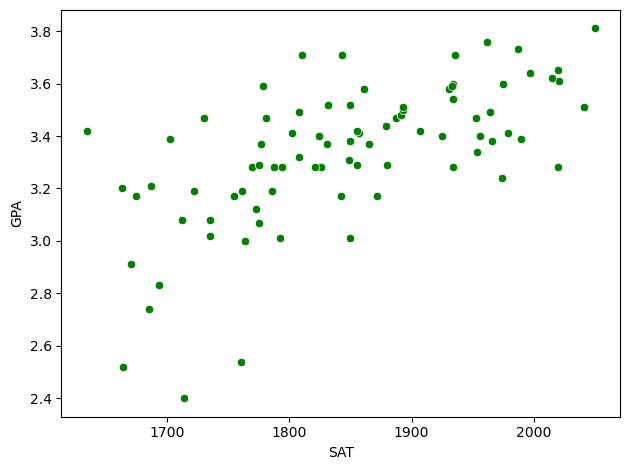

In [10]:
# plt.figure(figsize=(14, 8), dpi = 200)
sns.scatterplot(data=score, x='SAT', y = 'GPA', color ='green');

plt.tight_layout()

From the above, there is a <font color = 'green'> ___positive relationship___</font> between the SAT scores gooten and the GPA scores graduated with. Majority of the datapoints are tilted towards the higher end of the graph.

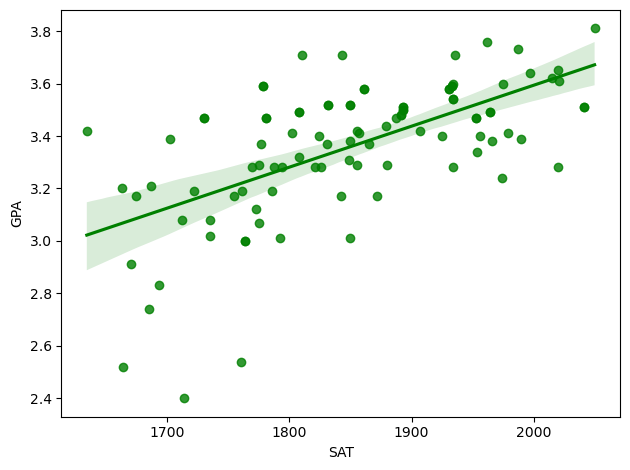

In [11]:
# plt.figure (figsize=(14, 8), dpi = 200)
sns.regplot(data=score, x='SAT', y = 'GPA', color = 'green');

plt.tight_layout()

_Using the _regplot_ allows for more visibility on the slope direction of the graph_

---
#### <font color = 'green'> __Model Development__

The data has one X feature- which makes it a Simple Linear Regression. For this, the simple straight line will be used <font color = 'green'>___(y =mx + b)___ </font>

This can be either using the ___np.Polyfit____ or by using ___.coef, ..intercept, and .predict___

##### <font color = 'green'> __Using Statsmodel__

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     58.86
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.26e-11
Time:                        11:45:00   Log-Likelihood:                 17.279
No. Observations:                 100   AIC:                            -30.56
Df Residuals:                      98   BIC:                            -25.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4713      0.377      1.249      0.2

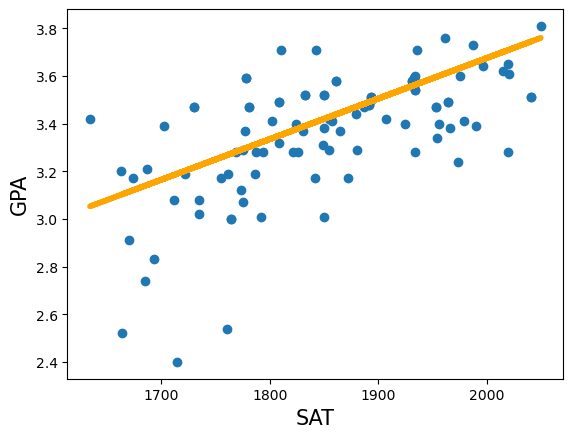

In [13]:
import statsmodels.api as sm

x1 = score['SAT']
Y = score['GPA']

X = sm.add_constant(x1)
results = sm.OLS(Y, X).fit()
print(results.summary())

plt.scatter(x1, Y)
yhat = 0.0017 *x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
plt.show()

##### <font color = 'green'> __Using Polyfit__

In [15]:
y1 = score['GPA']
X1 = score['SAT']
np.polyfit(X1, y1, deg = 1)

array([0.00156111, 0.47126246])

##### <font color = 'green'> __Using SKlearn__

Define the X and y AXIS

In [16]:
y = score['GPA']
X = score[['SAT']]

Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, shuffle=True, random_state=29)

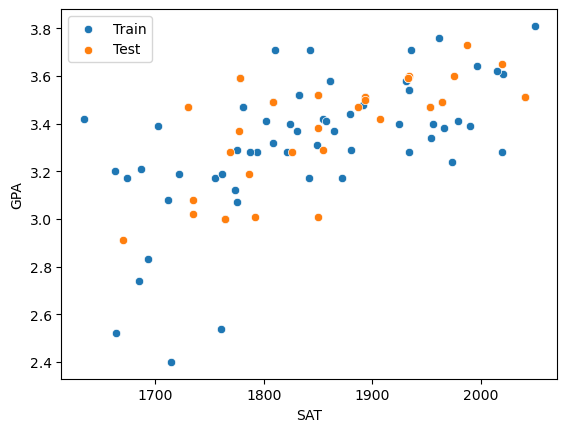

In [18]:
sns.scatterplot(x=X_train['SAT'], y=y_train, label='Train')
sns.scatterplot(x=X_test['SAT'], y= y_test, label='Test');

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [22]:
reg.fit(score[['SAT']], score['GPA'])


LinearRegression()

In [23]:
print(f'The coeficient value is {reg.coef_}')

The coeficient value is [0.00156111]


In [24]:
print(f'The intercept value is {reg.intercept_}')

The intercept value is 0.47126246455052234


In [25]:
pred_gpa = np.round(reg.predict(X_test), 2)
pred_gpa

array([3.49, 3.27, 3.18, 3.23, 3.26, 3.25, 3.43, 3.32, 3.25, 3.18, 3.52,
       3.45, 3.62, 3.08, 3.36, 3.49, 3.49, 3.37, 3.17, 3.42, 3.66, 3.43,
       3.36, 3.17, 3.36, 3.23, 3.29, 3.55, 3.57, 3.54])

In [26]:
np.array(y_test)

array([3.6 , 3.01, 3.02, 3.  , 3.19, 3.59, 3.51, 3.28, 3.37, 3.08, 3.47,
       3.42, 3.65, 2.91, 3.38, 3.59, 3.59, 3.29, 3.47, 3.47, 3.51, 3.5 ,
       3.52, 3.47, 3.01, 3.28, 3.49, 3.6 , 3.73, 3.49])

In [28]:
residual1 = y_test - pred_gpa

table_tst = pd.DataFrame({
    'True_GPA': y_test,
    'Pred_GPA': pred_gpa,
    'Residual_value': residual1,
})

# print(table_tst.to_string(index=False))
table_tst[:5].reset_index(drop=True)

,True_GPA,Pred_GPA,Residual_value
0,3.60,3.49,0.11
1,3.01,3.27,-0.26
2,3.02,3.18,-0.16
3,3.00,3.23,-0.23
4,3.19,3.26,-0.07


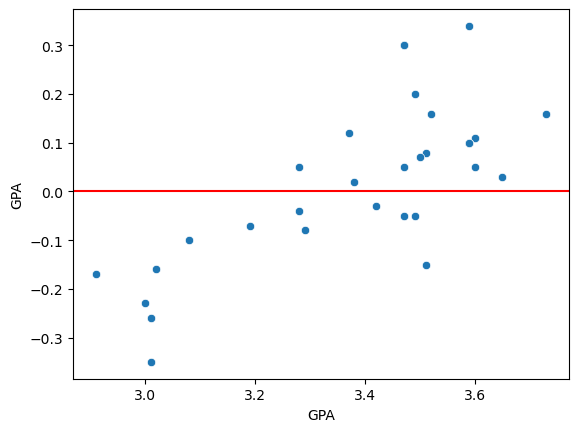

In [30]:
sns.scatterplot(x=y_test, y=residual1)
plt.axhline(y=0, color='red')

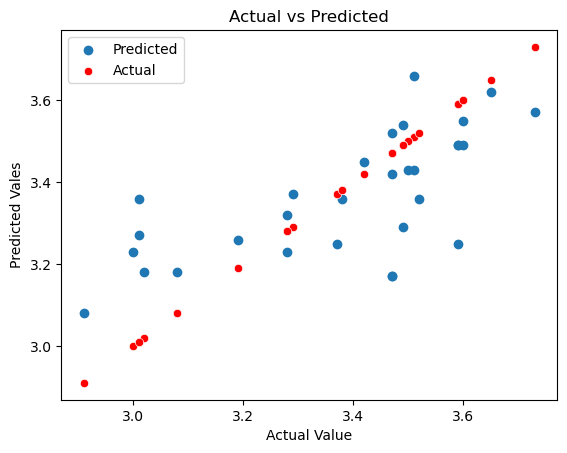

In [35]:
plt.scatter(x=y_test, y=pred_gpa, label = 'Predicted')
sns.scatterplot(x=y_test,y=y_test, color = 'red', label ='Actual')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Vales')
plt.title('Actual vs Predicted');

# Not sure if this is accurate


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
reg.score(X_train, y_train)

# the training score is quite low

0.3483770440502467

In [49]:
score['GPA'].mean()

3.360499999999999

In [50]:
mean_absolute_error(y_test, pred_gpa)
# the training score is quite low

0.13266666666666668

In [ ]:
# (0.13266666666666668/3.360499999999999) * 100

3.9478252244209706

In [51]:
np.sqrt(mean_squared_error(y_test, pred_gpa))

0.16352369858830862

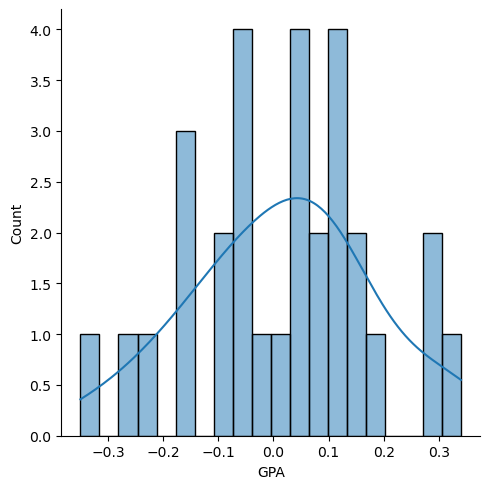

In [53]:
sns.displot(residual1, bins =20, kde = True)

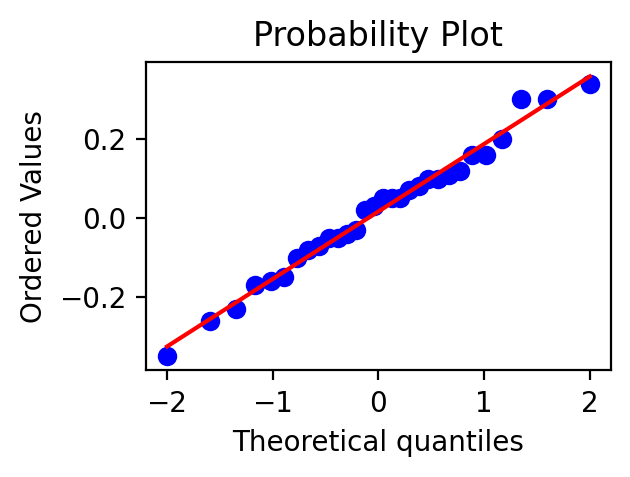

In [ ]:
# import scipy as sp
# fig, ax = plt.subplots (figsize=(3,2), dpi = 200)

# _ = sp.stats.probplot (residual1, plot=ax)

# I saw this somehwere but do not understand how it properly translates 

In [62]:
# My attempt to optimiz the model by increasing the creating another column. Following the example form class
score['SAT2'] = score['SAT']**2

In [64]:
X2_train, X2_test, y2_train, y2_test = train_test_split(score[['SAT','SAT2']], score['GPA'], test_size=0.4, shuffle=True, random_state=29)

In [65]:
reg2 = LinearRegression()
reg2.fit(X2_train, y2_train)

LinearRegression()

In [66]:
reg2.score(X2_train, y2_train)

# the training sore is still low

0.35869794509459574

In [67]:
# A third attempt to increas ethe training score
score['SAT3'] = score['SAT']**3
X3_train, X3_test, y3_train, y3_test = train_test_split(score[['SAT','SAT2', 'SAT3']], score['GPA'], test_size=0.4, shuffle=True, random_state=29)
reg3 = LinearRegression()
reg3.fit(X3_train, y3_train)

LinearRegression()

In [68]:
reg3.score(X3_train, y3_train)

0.3659430705641574

<font color = 'green'> __Testing the Equation__

<img src="./Images/istockphoto-487591111-612x612.jpg" alt="Image" style="width:100%;">